### **텍스트 마이닝: 감성분석**

**덱스트 마이닝(Text Mining)**</br>
* 텍스트 마이닝은 비정형의 텍스트 데이터로부터 패턴을 찾아내고 머신러닝을 적용하여 의미 있는 정보를 추출하는 분석과정 또는 기법</br>
* 웹페이지, 블로그, 전자저널, 이메일 등 전자문서로 된 텍스트자료로 부터 유용한 정보를 추출하여 분석하기 위한 도구</br>
* 텍스트 데이터로 부터 새로운 고급 정보를 이끌어 내는 과정 (Wikipedia, 2011b).</br>
* 텍스트 마이닝: </br>
  - **감성분석:** 덱스트에서 사용자의 주관적인 의견이나 감성, 태도를 분석. 텍스트에서 감성을 나타내는 단어를 기반으로 긍정 또는 부정의 감성을 결정 </br>
  - 토픽 모델링: 문서를 구성하는 키워드를 기반으로 토픽을 추출하고 추출한 토픽을 기준으로 클러스터링 및 분석을 하는 기법</br>

**텍스트 마이닝 프로세스**</br>
(1) 텍스트 전처리 - (2) **특성 벡터화** - (3) 머신러닝 모델 구축 및 학습 - (4) 평가

**특성 벡터화**</br>
* 머신러닝 알고리즘을 구성하기 위해서는 텍스트로 구성된 단어 기반의 특성 추출(feature extraction)을 하고 이를 숫자형 값인 벡터 값으로 표현해야 함</br>
* 카운트 기반 벡터화와 TF-IDF 기반 벡터화가 있음 </br>
* **TF-IDF(Term Frequency-Inverse Document Frequency) 기반 벡터화 :** </br>
  - 특정 문서에 많이 나타나는 단어는 해당 문서의 단어 벡터에 가중치를 높임 </br>
  - 모든 문서에 많이 나타나는 단어는 범용적으로 사용하는 단어로 취급하여 가중치를 낮추는 방식

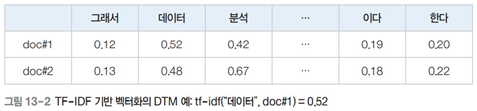

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
text = ['I go to my home my home is very large',
        'I went out my home I go to the market',
        'I bought a yellow lemon I go back to home',
        'I go to my school']
 
tfidf_vectorizer = TfidfVectorizer() #ngram_range = (1, 1), min_df = 2, max_df =3
# ngram_rnage(2, 2) 2단어 이상도 하나의 데이터로 보는 것
# 최소 2개 이상 나온것만 추출하고 최대 3번 나온 것 까지만 추출해

In [4]:
tfidf_vectorizer.fit(text) # 벡터라이저가 단어들을 학습

TfidfVectorizer()

In [5]:
tfidf_vectorizer.vocabulary_ # 벡터라이저가 학습한 단어사전을 출력

{'back': 0,
 'bought': 1,
 'go': 2,
 'home': 3,
 'is': 4,
 'large': 5,
 'lemon': 6,
 'market': 7,
 'my': 8,
 'out': 9,
 'school': 10,
 'the': 11,
 'to': 12,
 'very': 13,
 'went': 14,
 'yellow': 15}

#### **준비하기**

- pandas 버전이 1.1.4 이상인지 확인하고, 아니라면 upgrade

In [6]:
import pandas as pd
pd.__version__

'1.3.5'

* 한글 UnicodeEncodingError를 방지하기 위해 기본 인코딩을 "utf-8"로 설정

In [7]:
import os
os.environ["PYTHONIOENCODING"] = "utf-8"

In [8]:
import warnings
warnings.filterwarnings(action='ignore')

### **감성 분류 모델 구축**

####**1. 데이터 수집**

* 깃허브에서 데이터 파일 다운로드 : https://github.com/e9t/nsmc 

####**2. 데이터 준비 및 탐색**

**2-1) 훈련용 데이터 준비**

**(1) 훈련용 데이터 파일 불러오기**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
nsmc_train_df = pd.read_csv('/content/drive/MyDrive/DataScience/DataFile/ratings_train.txt', encoding='utf-8', sep='\t', engine='python')
nsmc_train_df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


**(2) 데이터의 정보 확인**

In [11]:
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [12]:
nsmc_train_df.shape

(150000, 3)

**(3) 결측치 제거**

In [13]:
nsmc_train_df.isna().sum()

id          0
document    5
label       0
dtype: int64

In [15]:
# na값이 아닌 것만 출력
nsmc_train_df['document'].notnull()

0         True
1         True
2         True
3         True
4         True
          ... 
149995    True
149996    True
149997    True
149998    True
149999    True
Name: document, Length: 150000, dtype: bool

In [16]:
nsmc_train_df = nsmc_train_df[nsmc_train_df['document'].notnull()]

In [17]:
nsmc_train_df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [18]:
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


**중복 확인**

In [19]:
nsmc_train_df.isna().sum()

id          0
document    0
label       0
dtype: int64

In [20]:
nsmc_train_df.duplicated().sum()

0

**(4) 타겟 컬럼 label 확인 (0: 부정감성,   1: 긍정감성)**

In [21]:
# 시험
nsmc_train_df['label'].value_counts()

0    75170
1    74825
Name: label, dtype: int64

**(5) 한글 이외의 문자는 공백으로 변환 (정규표현식 이용)**

In [22]:
import re
# 내일 시험 문제

In [23]:
string = "ㅋㅋㅎㅎ! ?안녕"

In [26]:
re.sub('[^가-힣]', '*', string)

'*******안녕'

In [27]:
re.sub('[^ㄱ-ㅣ가-힣]', '*', string)

'ㅋㅋㅎㅎ***안녕'

In [28]:
re.sub('[^ㄱ-ㅣ가-힣]+', '*', string)

'ㅋㅋㅎㅎ*안녕'

In [29]:
# 많이 쓰는 방식
re.sub('[^ㄱ-ㅣ가-힣]+', ' ', string).strip()

'ㅋㅋㅎㅎ 안녕'

In [30]:
# 람다 함수
def add_one(x):
  return x + 1

In [31]:
nsmc_train_df['label']

0         0
1         1
2         0
3         0
4         1
         ..
149995    0
149996    1
149997    0
149998    1
149999    0
Name: label, Length: 149995, dtype: int64

In [33]:
nsmc_train_df['label'].apply(add_one)

0         1
1         2
2         1
3         1
4         2
         ..
149995    1
149996    2
149997    1
149998    2
149999    1
Name: label, Length: 149995, dtype: int64

In [35]:
# lambda
nsmc_train_df['label'].apply(lambda x:x+1)

0         1
1         2
2         1
3         1
4         2
         ..
149995    1
149996    2
149997    1
149998    2
149999    1
Name: label, Length: 149995, dtype: int64

In [36]:
nsmc_train_df['label']

0         0
1         1
2         0
3         0
4         1
         ..
149995    0
149996    1
149997    0
149998    1
149999    0
Name: label, Length: 149995, dtype: int64

In [37]:
nsmc_train_df['document'] = nsmc_train_df['document'].apply(lambda x : re.sub('[^ ㄱ-ㅣ가-힣]+', " ", x)) #[^1-9a-zA-Z]
nsmc_train_df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


**2-2) 평가용 데이터 준비**

**(1) 평가용 데이터 파일 로드**

In [38]:
nsmc_test_df = pd.read_csv('/content/drive/MyDrive/DataScience/DataFile/ratings_test.txt', encoding='utf8', sep='\t', engine='python')
nsmc_test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


**(2) 데이터의 정보 확인**

In [39]:
nsmc_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


**(3) 결측치 제거**

In [40]:
nsmc_test_df['document'].notnull()

0        True
1        True
2        True
3        True
4        True
         ... 
49995    True
49996    True
49997    True
49998    True
49999    True
Name: document, Length: 50000, dtype: bool

In [41]:
nsmc_test_df = nsmc_test_df[nsmc_test_df['document'].notnull()]

**(4) 타겟 컬럼 label 확인 (0: 부정감성, 1: 긍정감성)**

In [42]:
print(nsmc_test_df['label'].value_counts())

1    25171
0    24826
Name: label, dtype: int64


**(5) 한글 이외의 문자는 공백으로 변환 (정규표현식 이용)**

In [43]:
nsmc_test_df['document'] = nsmc_test_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', "", x))

In [44]:
nsmc_test_df

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49997,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


#### **3. 분석 모델 구축**

**3-1) 피처 벡터화 : TF-IDF**

**(1) 형태소를 분석하여 토큰화 : 한글 형태소 엔진으로 Okt 이용**

In [45]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 46.4 MB/s 
     |████████████████████████████████| 453 kB 58.5 MB/s 


In [46]:
from konlpy.tag import Okt

okt = Okt()

In [47]:
def okt_tokenizer(text):
    tokens = okt.morphs(text) # 형태소만 추출
    return tokens

**(2) TF-IDF 기반 피처 벡터 생성**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
# 형태소만 가지고 추출하여 벡터화
tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
nsmc_train_tfidf = tfidf.fit_transform(nsmc_train_df['document'])

**3-2) 감성 분류 모델 구축 : 로지스틱 회귀를 이용한 이진 분류**

**(1) 로지스틱 회귀 기반 분석모델 생성**

In [49]:
from sklearn.linear_model import LogisticRegression

SA_lr = LogisticRegression(random_state = 0)

In [50]:
SA_lr.fit(nsmc_train_tfidf, nsmc_train_df['label'])

LogisticRegression(random_state=0)

#### **4. 분석 모델 평가**

**4-1) 평가용 데이터를 이용하여 감성 분석 모델 정확도**

In [51]:
# 평가용 데이터의 피처 벡터화
nsmc_test_tfidf = tfidf.transform(nsmc_test_df['document'])

In [52]:
test_predict = SA_lr.predict(nsmc_test_tfidf)

In [53]:
from sklearn.metrics import accuracy_score

print('감성 분석 정확도 : ', round(accuracy_score(nsmc_test_df['label'], test_predict), 3))

감성 분석 정확도 :  0.852


#### **5. 분석 모델의 활용**

**5-1) 새로운 텍스트에 대한 감성 예측**

In [58]:
st = input('감성 분석할 문장입력 >> ')

감성 분석할 문장입력 >> 와 씨발 이건 진짜 아니지 감독 누구냐


In [59]:
# 0) 입력 텍스트에 대한 전처리 수행
st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
print(st)
st = [" ".join(st)]
print(st)

['와', '씨발', '이건', '진짜', '아니지', '감독', '누구냐']
['와 씨발 이건 진짜 아니지 감독 누구냐']


In [60]:
# 1) 입력 텍스트의 피처 벡터화
st_tfidf = tfidf.transform(st)

# 2) 최적 감성분석 모델에 적용하여 감성 분석 평가
st_predict = SA_lr.predict(st_tfidf)

In [61]:
# 3) 예측 값 출력하기
if(st_predict== 0):
    print(st , "->> 부정 감성")
else :
    print(st , "->> 긍정 감성")

['와 씨발 이건 진짜 아니지 감독 누구냐'] ->> 부정 감성
